<a href="https://colab.research.google.com/github/Sirfowahid/Experimental_compressive_strengyh_analysis-deep_learning_algorithms/blob/main/Compressive_Strength_Regression_with_optimized_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
display.set_matplotlib_formats('svg')

<ipython-input-2-23d3895c745f>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.keras.utils.set_random_seed(2)
np.random.seed(2)
tf.random.set_seed(42)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Projects/08.Parametric Experiment of DL/Experimental_Data.xlsx')

In [ ]:
df.describe()

Water (kg/m³)  Cement (kg/m³)  Fine Aggregate (kg/m³)  \
count     165.000000      165.000000              165.000000   
mean      190.075098      391.290431              677.047412   
std        22.856019       78.494908               39.701859   
min       162.222662      280.136027              616.118338   
25%       168.924314      319.331858              616.118338   
50%       180.665440      360.000546              691.068587   
75%       224.721057      499.380127              703.046802   
max       224.721057      499.380127              738.858427   

       Coarse Aggregate (kg/m³)  Admixture  (kg/m³)  \
count                165.000000          165.000000   
mean                 922.201299            1.508535   
std                   50.338557            1.690548   
min                  843.109305            0.000000   
25%                  843.109305            0.000000   
50%                  941.970610            0.000000   
75%                  960.001456            3.592372   
max                  988.223146            3.692313   

       Experimental Compressive Strength (MPa)   
count                                165.000000  
mean                                  29.567152  
std                                   11.136550  
min                                    9.300000  
25%                                   20.160000  
50%                                   29.910000  
75%                                   37.800000  
max                                   50.800000

In [ ]:
cols = df.columns
cols

Index(['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)',
       'Experimental Compressive Strength (MPa) '],
      dtype='object')

In [ ]:
cols = ['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)',
       'Compressive Strength (MPa)']

In [ ]:
df.columns = cols

In [ ]:
df.head()

Water (kg/m³)  Cement (kg/m³)  Fine Aggregate (kg/m³)  \
0     197.822602      290.915591              727.288977   
1     192.935528      283.728718              709.321794   
2     194.007380      285.304971              713.262427   
3     190.492498      280.136027              700.340067   
4     198.883371      292.475546              731.188865   

   Coarse Aggregate (kg/m³)  Admixture  (kg/m³)  Compressive Strength (MPa)  
0                972.749006                 0.0                       22.40  
1                948.717900                 0.0                       21.90  
2                953.988496                 0.0                       21.75  
3                936.704840                 0.0                       22.80  
4                977.965107                 0.0                       21.95

In [ ]:
X = df[['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)']]

In [ ]:
y = df['Compressive Strength (MPa)']

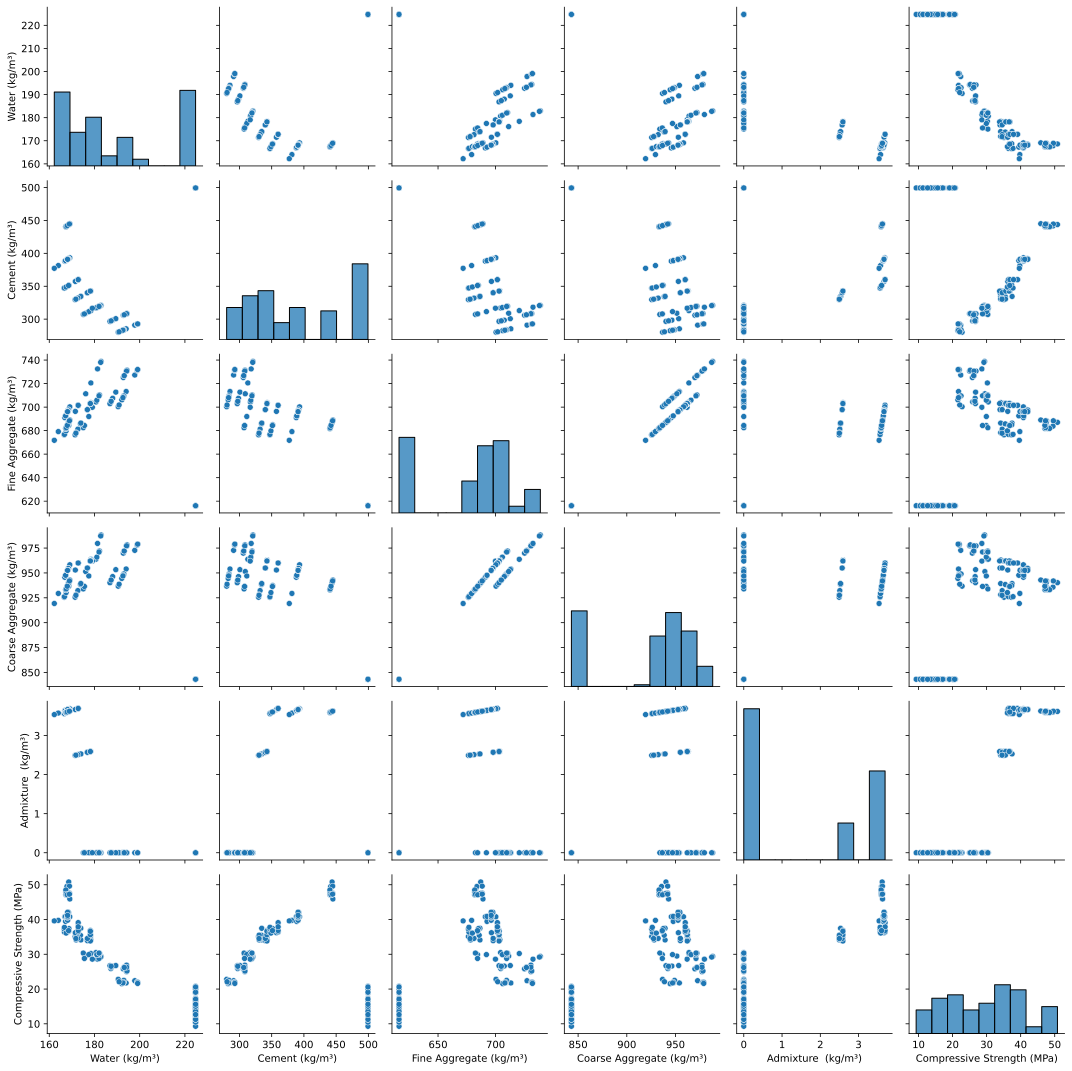

In [ ]:

sns.pairplot(df)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

In [ ]:
n_sample,n_features = X.values.shape
print(n_sample,n_features)
X_reshaped = X.values.reshape((n_sample,n_features,1))

165 5


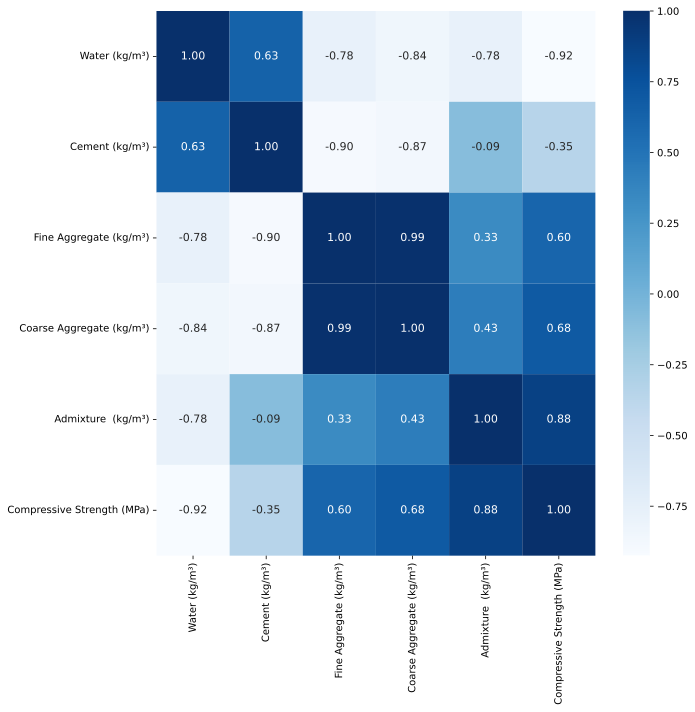

In [ ]:
cm = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.2f',cmap='Blues',annot_kws={"size":11})
plt.tight_layout()
plt.savefig('Data corelation.png')
plt.show()

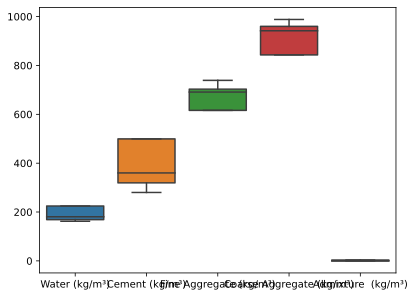

In [ ]:
sns.boxplot(X)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

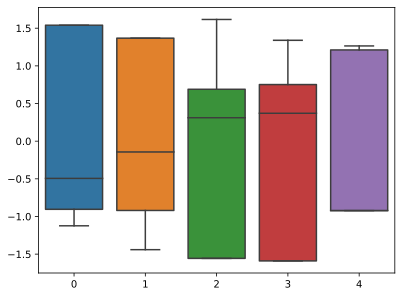

In [ ]:
sns.boxplot(X_train)
plt.show()

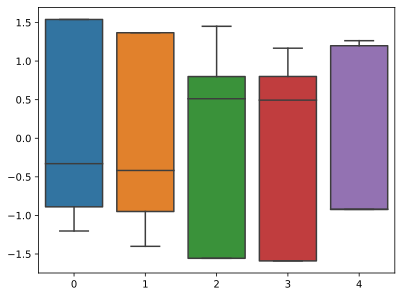

In [ ]:
sns.boxplot(X_test)
plt.show()

In [ ]:
def validation(y_test,y_pred):
  r2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  nstd = np.std(y_test)
  tstd = np.std(y_pred)
  print(f'R2 score:{r2} MAE:{mae} RMSE:{rmse} ActualStd {nstd} PredStd {tstd}')
  return r2

In [ ]:
n_sample,n_features = X_train.shape
print(n_sample,n_features)
X_train_reshaped = X_train.reshape((n_sample,n_features,1))

115 5


In [ ]:
n_sample,n_features = X_test.shape
X_test_reshaped = X_test.reshape((n_sample,n_features,1))

# Experiment with CNN

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=3,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)

])
cnn.summary()
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mse')
r = cnn.fit(X_reshaped,y,epochs=100,verbose=0)
y_pred = cnn.predict(X_reshaped)
y_pred.reshape(165)

validation(y,y_pred)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 8)              32        
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 8)              0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________

0.9670074728343439

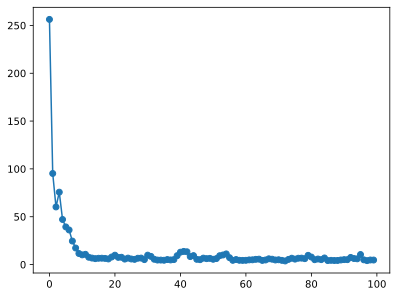

In [ ]:
plt.plot(r.history['loss'],'o-')
plt.show()

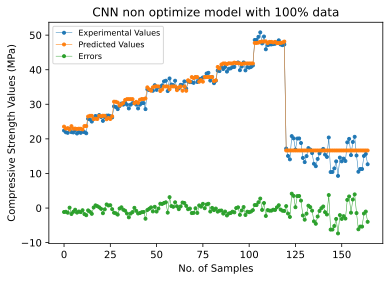

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(y,marker='.',linewidth=.5)
plt.plot(y_pred,marker='.',linewidth=.5)
plt.plot(y-y_pred.reshape(165),marker='.',linewidth=.5)
plt.legend(['Experimental Values','Predicted Values','Errors'],fontsize=8,loc='upper left')
plt.xlabel('No. of Samples')
plt.ylabel('Compressive Strength Values (MPa)')
plt.title('CNN non optimize model with 100% data')
plt.savefig('CNN non optimize model with 100% data.png')
plt.show()

In [ ]:
r = cnn.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,y_test),epochs=100,verbose=0)

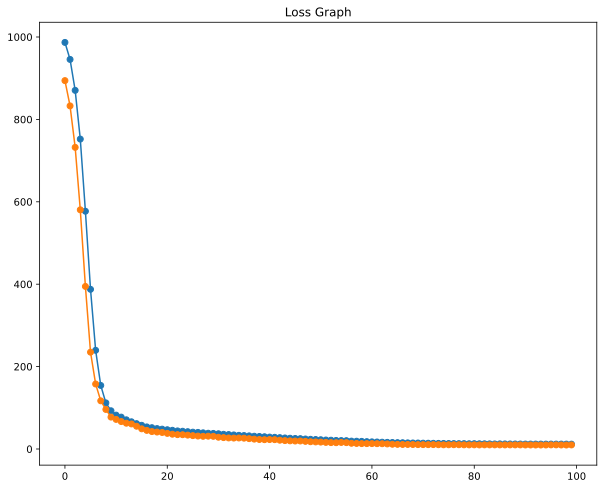

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.plot(r.history['val_loss'],'o-')
plt.title('Loss Graph')
plt.show()

In [ ]:
xlim_train = [-5,120]
xlim_test = [-5,50]
ylim = [-10,65]

In [ ]:
y_pred = cnn.predict(X_train_reshaped)
r2 = validation(y_train,y_pred)
print(y_pred.shape)

4/4 [==============================] - 0s 3ms/step
R2 score:0.9098338588988873 MAE:2.9067925733483357 RMSE:3.42588967731037 ActualStd 11.409106438124159 PredStd 10.733275413513184
(115, 1)


<Axes: xlabel='Compressive Strength (MPa)'>

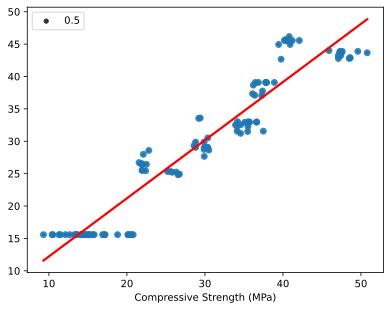

In [ ]:
sns.scatterplot(x=y_train, y=y_pred.reshape(y_pred.shape[0]),size=0.5)
sns.regplot(x=y_train, y=y_pred.reshape(y_pred.shape[0]), ci=None, line_kws={'color': 'red'})

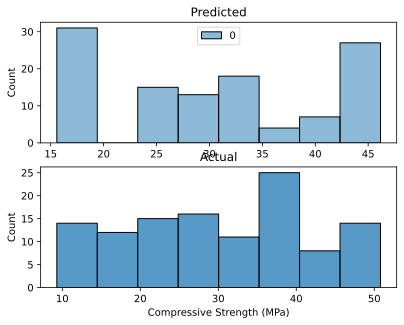

In [ ]:
plt.subplot(2,1,1)
sns.histplot(y_pred)
plt.title('Predicted')
plt.subplot(2,1,2)
sns.histplot(y_train)
plt.title('Actual')
plt.show()

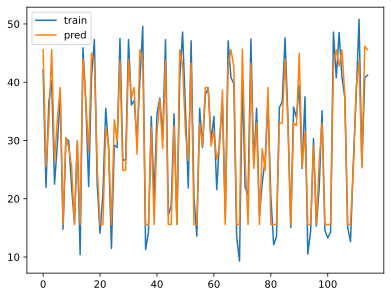

In [ ]:
plt.plot(y_train.values)
plt.plot(y_pred)
plt.legend(['train','pred'])
plt.show()

4/4 [==============================] - 0s 4ms/step
R2 score:0.9098338588988873 MAE:2.9067925733483357 RMSE:3.42588967731037 ActualStd 11.409106438124159 PredStd 10.733275413513184


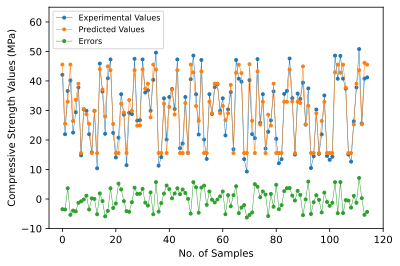

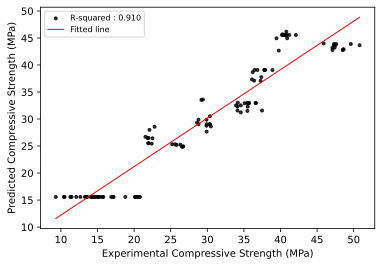

In [ ]:
def plot(cnn,X_train_reshaped,y_train,name,xlim):
  y_pred = cnn.predict(X_train_reshaped)
  r2 = validation(y_train,y_pred)
  error = y_train-y_pred.reshape(y_pred.shape[0])

  plt.figure(figsize=(6,4))
  plt.plot(y_train.values,marker='.',linewidth=.5)
  plt.plot(y_pred,marker='.',linewidth=.5)
  plt.plot(error.values,marker='.',linewidth=.5)
  plt.legend(['Experimental Values','Predicted Values','Errors'],fontsize=8,loc='upper left')
  plt.xlabel('No. of Samples')
  plt.ylabel('Compressive Strength Values (MPa)')
  plt.ylim(ylim)
  plt.xlim(xlim)
  plt.savefig(name)
  plt.show()

  plt.figure(figsize=(6,4))
  #sns.scatterplot(x=y_train, y=y_pred.reshape(y_pred.shape[0]),size=0.5)
  sns.regplot(x=y_train, y=y_pred.reshape(y_pred.shape[0]), ci=None, line_kws={'color': 'red','linewidth':1},marker='.',color='black')
  plt.xlabel('Experimental Compressive Strength (MPa)')
  plt.ylabel('Predicted Compressive Strength (MPa)')
  plt.xticks([10,15,20,25,30,35,40,45,50])
  plt.yticks([10,15,20,25,30,35,40,45,50])
  plt.legend(['R-squared : '+'%0.3f'%r2,'Fitted line'],fontsize=8,loc='upper left')
  plt.savefig('reg plot'+name)
  plt.show()
plot(cnn,X_train_reshaped,y_train,'cnn non optimize with train',xlim_train)

2/2 [==============================] - 0s 3ms/step
R2 score:0.9073396691817386 MAE:2.6090269485473634 RMSE:3.147777039519992 ActualStd 10.340869085333203 PredStd 10.54682445526123


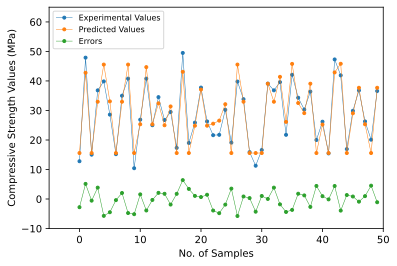

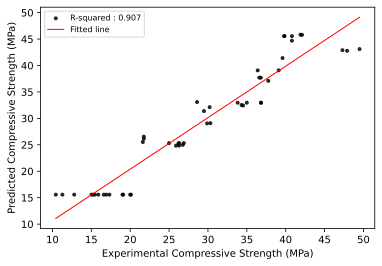

In [ ]:
plot(cnn,X_test_reshaped,y_test,'cnn non optimize with test',xlim_test)

In [ ]:
dftt = pd.DataFrame(y_pred)

In [ ]:
dftt['train'] = pd.DataFrame(y_train)

In [ ]:
dftt.head()

0  train
0  45.558708  22.40
1  25.526438  21.90
2  32.963104    NaN
3  45.558708  22.80
4  26.434975  21.95

In [ ]:
n_sample,n_features = X_test.shape
X_test_reshaped = X_test.reshape((n_sample,n_features,1))
y_pred = cnn.predict(X_test_reshaped)
validation(y_test,y_pred)

2/2 [==============================] - 0s 6ms/step
R2 score:0.9073396691817386 MAE:2.6090269485473634 RMSE:3.147777039519992 ActualStd 10.340869085333203 PredStd 10.54682445526123


0.9073396691817386

2/2 [==============================] - 0s 6ms/step
R2 score:0.9073396691817386 MAE:2.6090269485473634 RMSE:3.147777039519992 ActualStd 10.340869085333203 PredStd 10.54682445526123


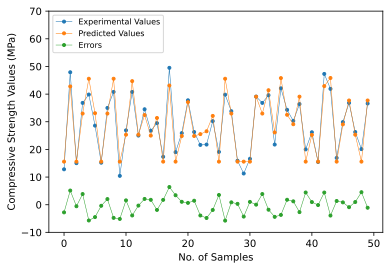

In [ ]:
y_pred = cnn.predict(X_test_reshaped)
validation(y_test,y_pred)
error = y_test-y_pred.reshape(y_pred.shape[0])
plt.figure(figsize=(6,4))
plt.plot(y_test.values,marker='.',linewidth=.5)
plt.plot(y_pred,marker='.',linewidth=.5)
plt.plot(error.values,marker='.',linewidth=.5)
plt.legend(['Experimental Values','Predicted Values','Errors'],fontsize=8,loc='upper left')
plt.xlabel('No. of Samples')
plt.ylabel('Compressive Strength Values (MPa)')
#plt.title('CNN non optimize model with 30% test data')
plt.savefig('CNN non optimize model with 30% test data')
plt.ylim([-10,70])
plt.show()

In [ ]:

def experiment_with_lr(mod,lrs):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(8,kernel_size=3,activation='relu',input_shape=(n_features,1)),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(8,activation='relu'),
      tf.keras.layers.Dense(1)

  ])
  for lr in lrs:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss='mse')
    r = model.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,y_test),epochs=100,verbose=0)
    y_pred = model.predict(X_train_reshaped)
    print(f'Training validation with lr {lr}.png')
    validation(y_train,y_pred)
    name = f'{mod} optimize train with lr {lr}.png'
    plot(model,X_train_reshaped,y_train,name,xlim_train)

    y_pred = model.predict(X_test_reshaped)
    print(f'Testing validation with lr {lr}.png')
    validation(y_test,y_pred)
    name = f'{mod} optimize test with lr {lr}.png'
    plot(model,X_test_reshaped,y_test,name,xlim_test)
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')



4/4 [==============================] - 0s 3ms/step
Training validation with lr 0.1.png
R2 score:0.9680105806678477 MAE:1.5284501475458554 RMSE:2.0405855653770724 ActualStd 11.409106438124159 PredStd 10.621472358703613
4/4 [==============================] - 0s 3ms/step
R2 score:0.9680105806678477 MAE:1.5284501475458554 RMSE:2.0405855653770724 ActualStd 11.409106438124159 PredStd 10.621472358703613


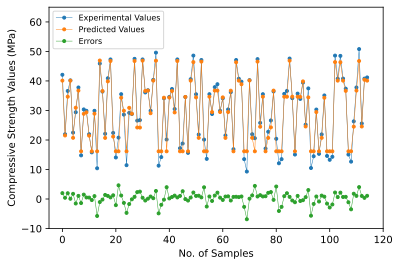

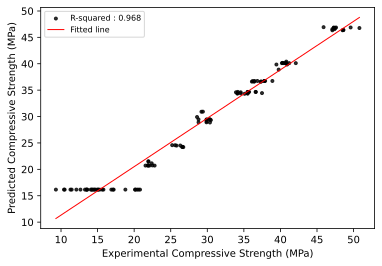

2/2 [==============================] - 0s 5ms/step
Testing validation with lr 0.1.png
R2 score:0.9642260550757011 MAE:1.4870001556396488 RMSE:1.9558721243478632 ActualStd 10.340869085333203 PredStd 9.857878684997559
2/2 [==============================] - 0s 7ms/step
R2 score:0.9642260550757011 MAE:1.4870001556396488 RMSE:1.9558721243478632 ActualStd 10.340869085333203 PredStd 9.857878684997559


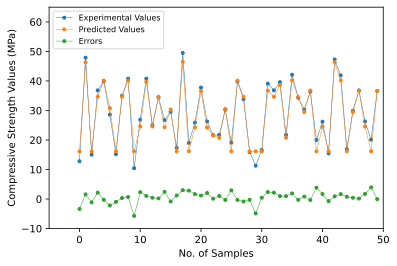

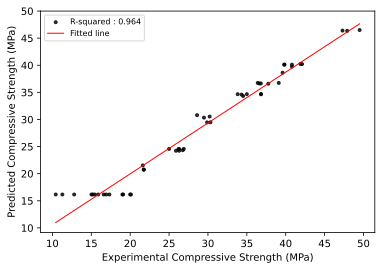

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 3ms/step
Training validation with lr 0.01.png
R2 score:0.9752818093884383 MAE:1.1537106001480766 RMSE:1.7937419714779343 ActualStd 11.409106438124159 PredStd 11.396842956542969
4/4 [==============================] - 0s 4ms/step
R2 score:0.9752818093884383 MAE:1.1537106001480766 RMSE:1.7937419714779343 ActualStd 11.409106438124159 PredStd 11.396842956542969


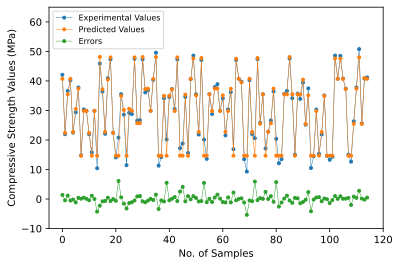

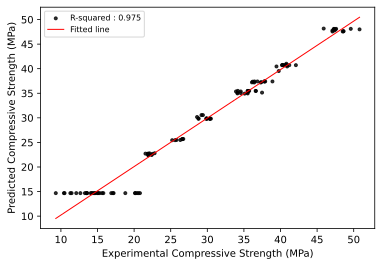

2/2 [==============================] - 0s 4ms/step
Testing validation with lr 0.01.png
R2 score:0.9661400913650088 MAE:1.37380548248291 RMSE:1.9028297419084885 ActualStd 10.340869085333203 PredStd 10.619163513183594
2/2 [==============================] - 0s 4ms/step
R2 score:0.9661400913650088 MAE:1.37380548248291 RMSE:1.9028297419084885 ActualStd 10.340869085333203 PredStd 10.619163513183594


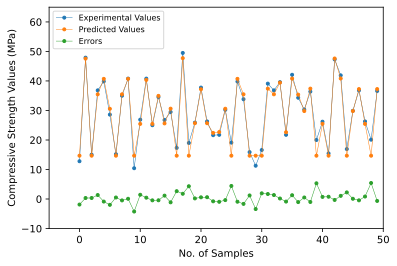

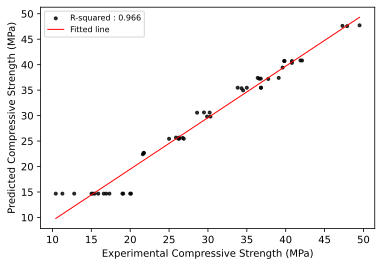

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 3ms/step
Training validation with lr 0.001.png
R2 score:0.9756783016992787 MAE:1.1618636862713352 RMSE:1.7792975479720268 ActualStd 11.409106438124159 PredStd 11.273909568786621
4/4 [==============================] - 0s 3ms/step
R2 score:0.9756783016992787 MAE:1.1618636862713352 RMSE:1.7792975479720268 ActualStd 11.409106438124159 PredStd 11.273909568786621


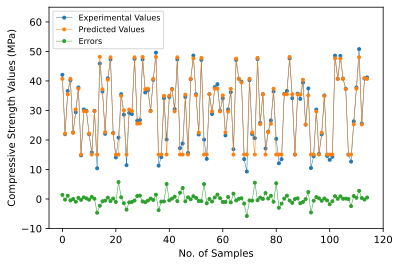

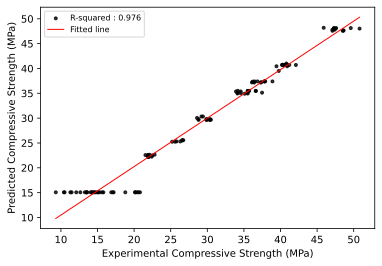

2/2 [==============================] - 0s 17ms/step
Testing validation with lr 0.001.png
R2 score:0.968641181543711 MAE:1.3127393692016602 RMSE:1.8312046626161713 ActualStd 10.340869085333203 PredStd 10.487180709838867
2/2 [==============================] - 0s 4ms/step
R2 score:0.968641181543711 MAE:1.3127393692016602 RMSE:1.8312046626161713 ActualStd 10.340869085333203 PredStd 10.487180709838867


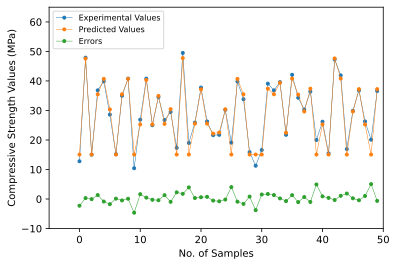

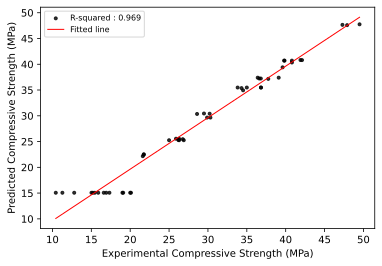

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.0001.png
R2 score:0.975678291575268 MAE:1.1612298514324682 RMSE:1.7792979182920867 ActualStd 11.409106438124159 PredStd 11.278116226196289
4/4 [==============================] - 0s 3ms/step
R2 score:0.975678291575268 MAE:1.1612298514324682 RMSE:1.7792979182920867 ActualStd 11.409106438124159 PredStd 11.278116226196289


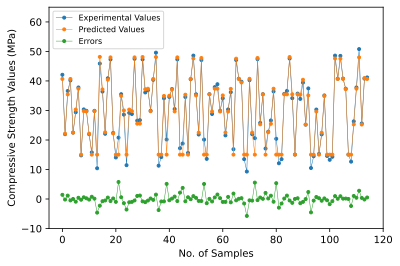

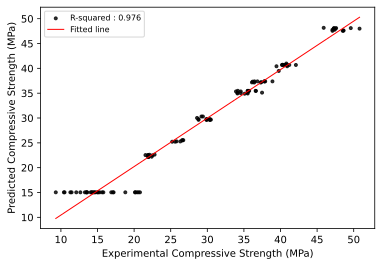

2/2 [==============================] - 0s 5ms/step
Testing validation with lr 0.0001.png
R2 score:0.9684231060649363 MAE:1.3176929443359375 RMSE:1.8375609123542602 ActualStd 10.340869085333203 PredStd 10.491983413696289
2/2 [==============================] - 0s 5ms/step
R2 score:0.9684231060649363 MAE:1.3176929443359375 RMSE:1.8375609123542602 ActualStd 10.340869085333203 PredStd 10.491983413696289


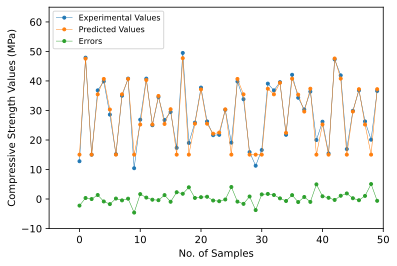

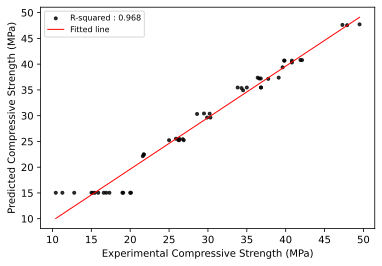

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------


In [ ]:
experiment_with_lr('cnn ',lrs = [0.1,0.01,0.001,0.0001])

In [ ]:
optimizers = {
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.01),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001)
}


In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=3,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)

])
cnn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='mse')
cnn.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,y_test),epochs=200,verbose=0)
y_pred = cnn.predict(X_train_reshaped)
print('For training')
validation(y_train,y_pred)
y_pred = cnn.predict(X_test_reshaped)
validation(y_test,y_pred)

4/4 [==============================] - 0s 4ms/step
For training
R2 score:0.9654520233582589 MAE:1.549146472433339 RMSE:2.1206204268545386 ActualStd 11.409106438124159 PredStd 10.594148635864258
2/2 [==============================] - 0s 6ms/step
R2 score:0.9625703105869519 MAE:1.4749080993652348 RMSE:2.000622513540866 ActualStd 10.340869085333203 PredStd 9.983658790588379


0.9625703105869519

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=3,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)

])
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),loss='mse')
cnn.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,y_test),epochs=200,verbose=0)
y_pred = cnn.predict(X_train_reshaped)
print('For training')
validation(y_train,y_pred)
y_pred = cnn.predict(X_test_reshaped)
validation(y_test,y_pred)

4/4 [==============================] - 0s 3ms/step
For training
R2 score:0.960230944912321 MAE:1.7444061750329054 RMSE:2.275224564378287 ActualStd 11.409106438124159 PredStd 10.560193061828613
2/2 [==============================] - 0s 7ms/step
R2 score:0.951822026473809 MAE:1.79499771194458 RMSE:2.269767140094623 ActualStd 10.340869085333203 PredStd 9.856914520263672


0.951822026473809

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=3,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)

])
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mse')
r = cnn.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
y_pred = cnn.predict(X_train_reshaped)
y_pred.reshape(115)

validation(y_train,y_pred)

4/4 [==============================] - 0s 3ms/step
R2 score:0.9267891788148848 MAE:2.5553064568561052 RMSE:3.087018775473633 ActualStd 11.409106438124159 PredStd 11.026590347290039


0.9267891788148848

# Experiments with GRU

In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
gru.summary()
gru.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='mse')
r = gru.fit(X_reshaped,y,epochs=200,verbose=0)
y_pred = gru.predict(X_reshaped)
validation(y,y_pred)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16)                912       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1201 (4.69 KB)
Trainable params: 1201 (4.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
6/6 [==============================] - 1s 3ms/step
R2 score:0.7671698586939533 MAE:4.446259404037937 RMSE:5.357352414779545 ActualStd 11.102751381967016 PredStd 9.997939109802246


0.7671698586939533

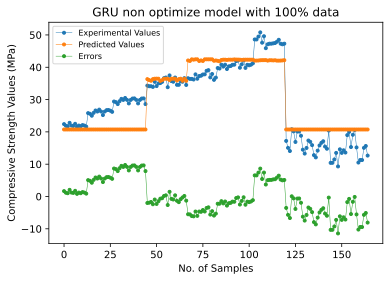

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(y,marker='.',linewidth=.5)
plt.plot(y_pred,marker='.',linewidth=.5)
plt.plot(y-y_pred.reshape(165),marker='.',linewidth=.5)
plt.legend(['Experimental Values','Predicted Values','Errors'],fontsize=8,loc='upper left')
plt.xlabel('No. of Samples')
plt.ylabel('Compressive Strength Values (MPa)')
plt.title('GRU non optimize model with 100% data')
plt.savefig('GRU non optimize model with 100% data.png')
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 16)                912       
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1201 (4.69 KB)
Trainable params: 1201 (4.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training validation
4/4 [==============================] - 0s 3ms/step
R2 score:0.8990166202122943 MAE:3.0515891242649245 RMSE:3.625572405343976 ActualStd 11.409106438124159 PredStd 10.660856246948242


0.8990166202122943

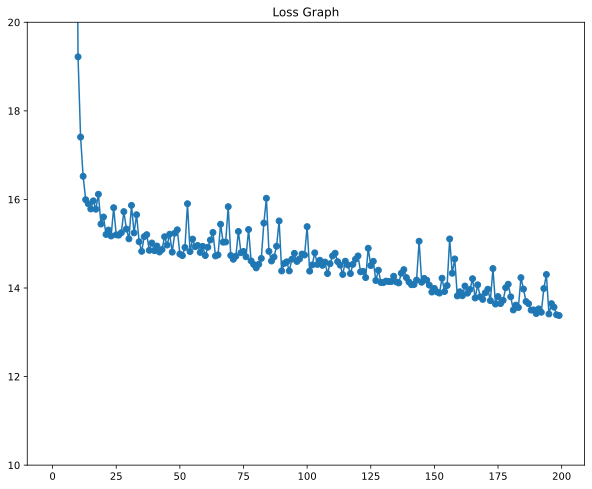

In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
gru.summary()
gru.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='mse')
r = gru.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.ylim([10,20])
plt.title('Loss Graph')
print('Training validation')
y_pred = gru.predict(X_train_reshaped)
validation(y_train,y_pred)


2/2 [==============================] - 0s 6ms/step
R2 score:0.9032542244043278 MAE:2.5698139480590823 RMSE:3.2164221581859516 ActualStd 10.340869085333203 PredStd 10.435516357421875


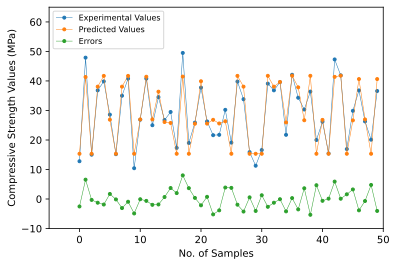

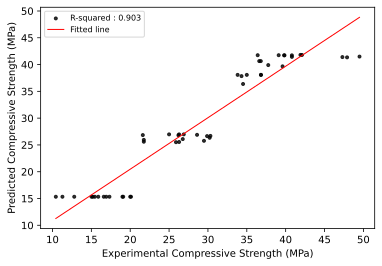

In [ ]:
plot(gru,X_test_reshaped,y_test,'gru non optimize with test.png',xlim_test)
#plot(cnn,X_test_reshaped,y_test,'bello',xlim_test)

4/4 [==============================] - 0s 4ms/step
R2 score:0.8990166202122943 MAE:3.0515891242649245 RMSE:3.625572405343976 ActualStd 11.409106438124159 PredStd 10.660856246948242


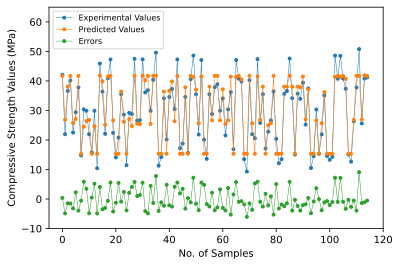

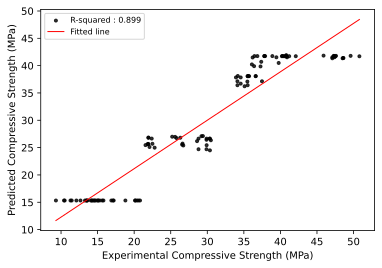

In [ ]:
plot(gru,X_train_reshaped,y_train,'gru non optimize with train.png',xlim_train)
#plot(cnn,X_test_reshaped,y_test,'bello',xlim_test)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 16)                912       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1201 (4.69 KB)
Trainable params: 1201 (4.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training validation
4/4 [==============================] - 0s 4ms/step
R2 score:0.8871410982964457 MAE:3.199856776030167 RMSE:3.832829862629592 ActualStd 11.409106438124159 PredStd 10.725414276123047
Testing validation
2/2 [==============================] - 0s 8ms/step
R2 score:0.8914

0.8914575932191744

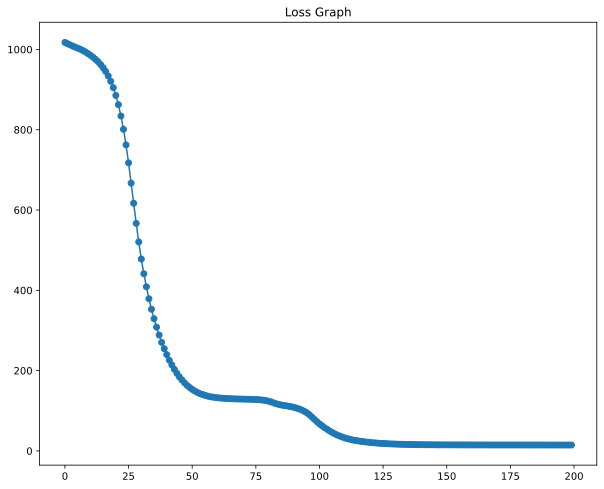

In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
gru.summary()
gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse')
r = gru.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
print('Training validation')
y_pred = gru.predict(X_train_reshaped)
validation(y_train,y_pred)
print('Testing validation')
y_pred = gru.predict(X_test_reshaped)
validation(y_test,y_pred)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 16)                912       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1201 (4.69 KB)
Trainable params: 1201 (4.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training validation
4/4 [==============================] - 0s 6ms/step
R2 score:0.8955120789366225 MAE:2.909912851416546 RMSE:3.6879470410856845 ActualStd 11.409106438124159 PredStd 10.459117889404297
Testing validation
2/2 [==============================] - 0s 6ms/step
R2 score:0.904

0.9048818201724539

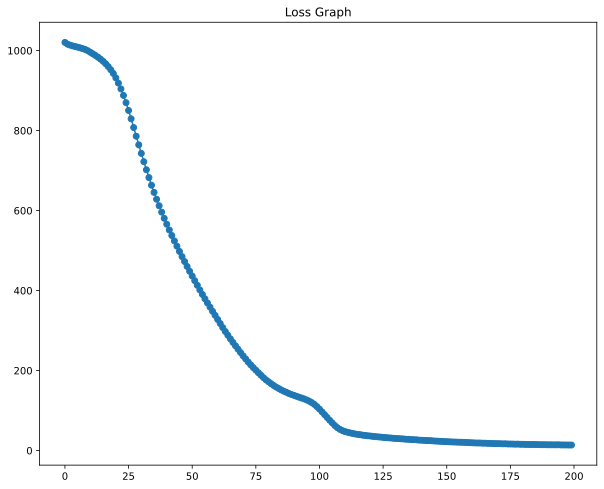

In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
gru.summary()
gru.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='mse')
r = gru.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
print('Training validation')
y_pred = gru.predict(X_train_reshaped)
validation(y_train,y_pred)
print('Testing validation')
y_pred = gru.predict(X_test_reshaped)
validation(y_test,y_pred)

In [ ]:

def experiment_with_lr(mod,lrs):
  model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
  ])
  for lr in lrs:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss='mse')
    r = model.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,y_test),epochs=200,verbose=0)
    y_pred = model.predict(X_train_reshaped)
    print(f'Training validation with lr {lr}')
    validation(y_train,y_pred)
    name = f'{mod} optimize train with lr {lr}.png'
    plot(model,X_train_reshaped,y_train,name,xlim_train)

    y_pred = model.predict(X_test_reshaped)
    print(f'Testing validation with lr {lr}')
    validation(y_test,y_pred)
    name = f'{mod} optimize test with lr {lr}.png'
    plot(model,X_test_reshaped,y_test,name,xlim_test)
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')



4/4 [==============================] - 0s 3ms/step
Training validation with lr 0.1
R2 score:0.9109763005765751 MAE:2.7695125845204234 RMSE:3.404116781844085 ActualStd 11.409106438124159 PredStd 11.046159744262695
4/4 [==============================] - 0s 3ms/step
R2 score:0.9109763005765751 MAE:2.7695125845204234 RMSE:3.404116781844085 ActualStd 11.409106438124159 PredStd 11.046159744262695


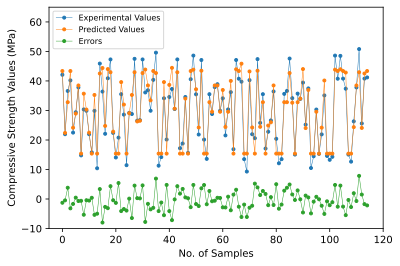

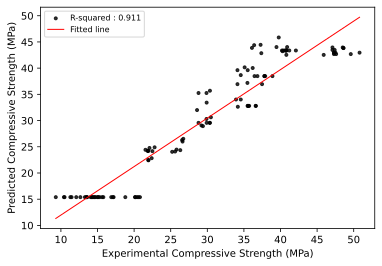

2/2 [==============================] - 0s 5ms/step
Testing validation with lr 0.1
R2 score:0.8984618454459381 MAE:2.6722753265380863 RMSE:3.295123321966697 ActualStd 10.340869085333203 PredStd 11.016748428344727
2/2 [==============================] - 0s 9ms/step
R2 score:0.8984618454459381 MAE:2.6722753265380863 RMSE:3.295123321966697 ActualStd 10.340869085333203 PredStd 11.016748428344727


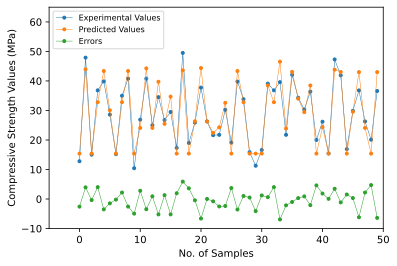

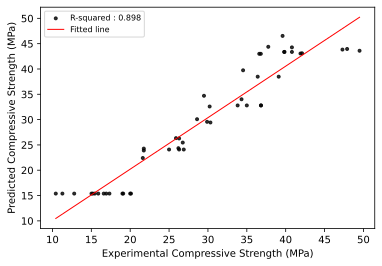

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.01
R2 score:0.9761682777887839 MAE:1.0971606922978938 RMSE:1.7612838212033157 ActualStd 11.409106438124159 PredStd 11.28048038482666
4/4 [==============================] - 0s 5ms/step
R2 score:0.9761682777887839 MAE:1.0971606922978938 RMSE:1.7612838212033157 ActualStd 11.409106438124159 PredStd 11.28048038482666


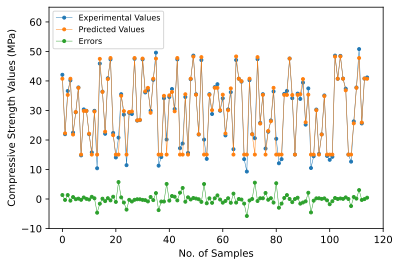

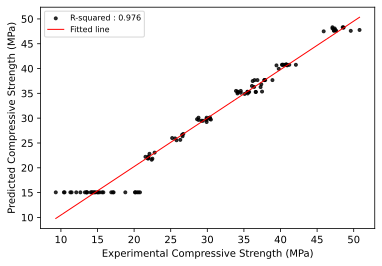

2/2 [==============================] - 0s 6ms/step
Testing validation with lr 0.01
R2 score:0.9688605062209058 MAE:1.2845509895324705 RMSE:1.8247896714172809 ActualStd 10.340869085333203 PredStd 10.521809577941895
2/2 [==============================] - 0s 4ms/step
R2 score:0.9688605062209058 MAE:1.2845509895324705 RMSE:1.8247896714172809 ActualStd 10.340869085333203 PredStd 10.521809577941895


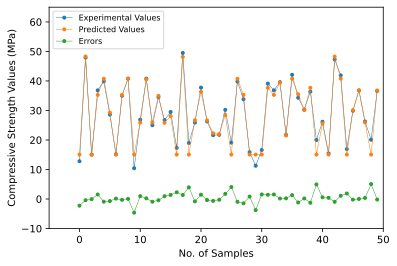

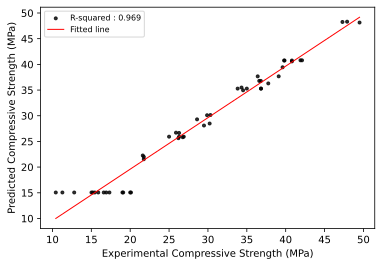

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.001
R2 score:0.9762298975246446 MAE:1.093092083143151 RMSE:1.7590053436366346 ActualStd 11.409106438124159 PredStd 11.271595001220703
4/4 [==============================] - 0s 4ms/step
R2 score:0.9762298975246446 MAE:1.093092083143151 RMSE:1.7590053436366346 ActualStd 11.409106438124159 PredStd 11.271595001220703


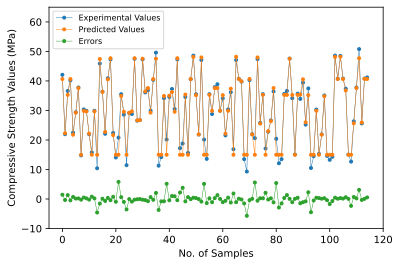

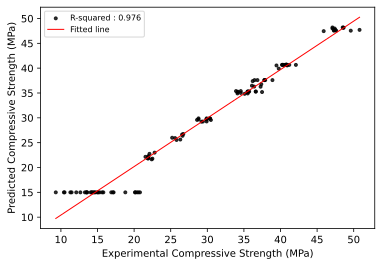

2/2 [==============================] - 0s 5ms/step
Testing validation with lr 0.001
R2 score:0.968067483526042 MAE:1.2966312210083009 RMSE:1.8478793509025428 ActualStd 10.340869085333203 PredStd 10.512819290161133
2/2 [==============================] - 0s 7ms/step
R2 score:0.968067483526042 MAE:1.2966312210083009 RMSE:1.8478793509025428 ActualStd 10.340869085333203 PredStd 10.512819290161133


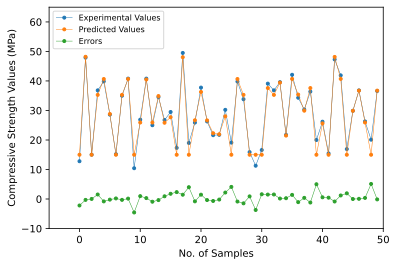

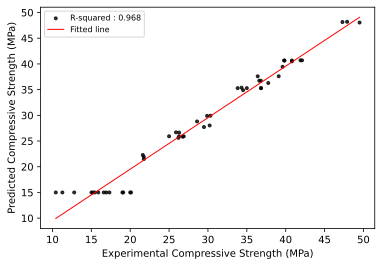

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.0001
R2 score:0.9762527465202072 MAE:1.0903888616147246 RMSE:1.7581597190018128 ActualStd 11.409106438124159 PredStd 11.277641296386719
4/4 [==============================] - 0s 4ms/step
R2 score:0.9762527465202072 MAE:1.0903888616147246 RMSE:1.7581597190018128 ActualStd 11.409106438124159 PredStd 11.277641296386719


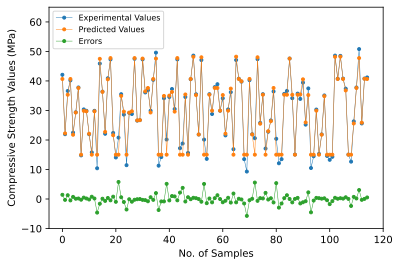

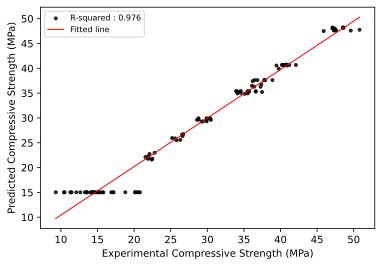

2/2 [==============================] - 0s 9ms/step
Testing validation with lr 0.0001
R2 score:0.9682440454225887 MAE:1.2951032814025876 RMSE:1.842763604199116 ActualStd 10.340869085333203 PredStd 10.51611042022705
2/2 [==============================] - 0s 7ms/step
R2 score:0.9682440454225887 MAE:1.2951032814025876 RMSE:1.842763604199116 ActualStd 10.340869085333203 PredStd 10.51611042022705


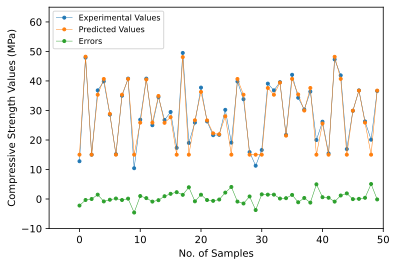

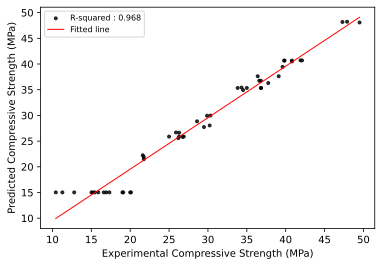

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------


In [ ]:
experiment_with_lr('gru',[0.1,0.01,0.001,0.0001])

# Experiment with LSTM

In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
lstm.summary()
lstm.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='mse')
r = lstm.fit(X_reshaped,y,epochs=200,verbose=0)
y_pred = lstm.predict(X_reshaped)
validation(y,y_pred)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense_30 (Dense)            (None, 16)                272       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
6/6 [==============================] - 0s 3ms/step
R2 score:0.7673957556187536 MAE:4.426958286632191 RMSE:5.354752873512633 ActualStd 11.102751381967016 PredStd 9.840327262878418


0.7673957556187536

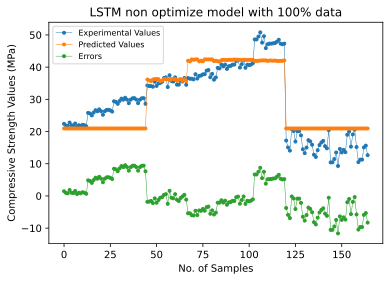

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(y,marker='.',linewidth=.5)
plt.plot(y_pred,marker='.',linewidth=.5)
plt.plot(y-y_pred.reshape(165),marker='.',linewidth=.5)
plt.legend(['Experimental Values','Predicted Values','Errors'],fontsize=8,loc='upper left')
plt.xlabel('No. of Samples')
plt.ylabel('Compressive Strength Values (MPa)')
plt.title('LSTM non optimize model with 100% data')
plt.savefig('LSTM non optimize model with 100% data.png')
plt.show()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1152      
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training validation
4/4 [==============================] - 0s 3ms/step
R2 score:0.8992737953540184 MAE:3.009710505609927 RMSE:3.620952825872975 ActualStd 11.409106438124159 PredStd 10.774178504943848


0.8992737953540184

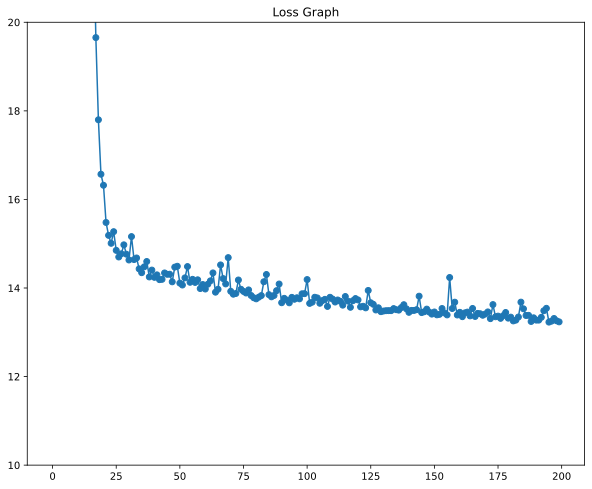

In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
lstm.summary()
lstm.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='mse')
r = lstm.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.ylim([10,20])
plt.title('Loss Graph')
print('Training validation')
y_pred = lstm.predict(X_train_reshaped)
validation(y_train,y_pred)


4/4 [==============================] - 0s 3ms/step
R2 score:0.8992737953540184 MAE:3.009710505609927 RMSE:3.620952825872975 ActualStd 11.409106438124159 PredStd 10.774178504943848


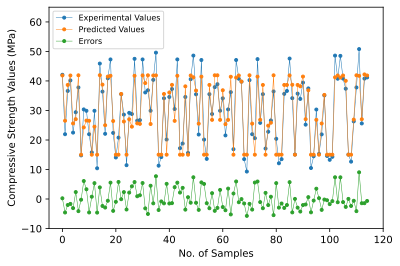

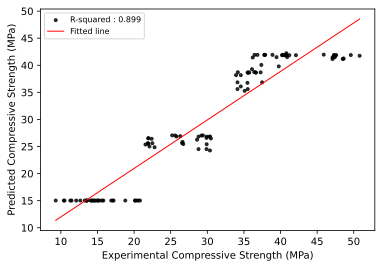

In [ ]:
plot(lstm,X_train_reshaped,y_train,'lstm non optimize with train.png',xlim_train)
#plot(cnn,X_test_reshaped,y_test,'bello',xlim_test)

2/2 [==============================] - 0s 6ms/step
R2 score:0.9008038536875166 MAE:2.6134441917419435 RMSE:3.2569001207698913 ActualStd 10.340869085333203 PredStd 10.526243209838867


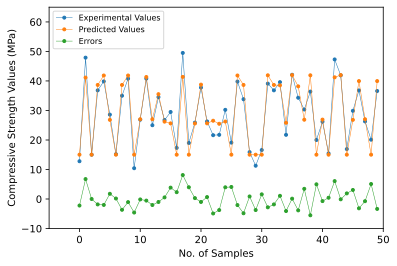

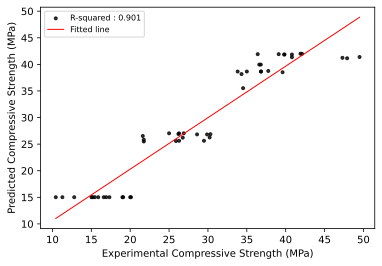

In [ ]:
plot(lstm,X_test_reshaped,y_test,'lstm non optimize with test.png',xlim_test)
#plot(cnn,X_test_reshaped,y_test,'bello',xlim_test)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1152      
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training validation
4/4 [==============================] - 0s 4ms/step
R2 score:0.894176988528955 MAE:2.9090991804703417 RMSE:3.7114335557144393 ActualStd 11.409106438124159 PredStd 10.419411659240723
Testing validation
2/2 [==============================] - 0s 6ms/step
R2 score:0.899

0.8995520610982155

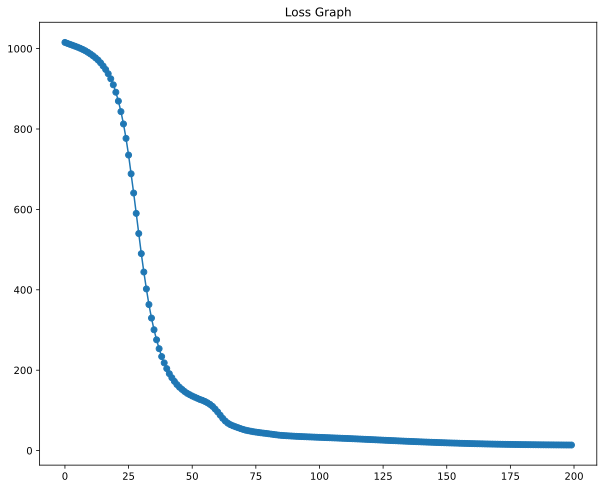

In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
lstm.summary()
lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse')
r = lstm.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
print('Training validation')
y_pred = lstm.predict(X_train_reshaped)
validation(y_train,y_pred)
print('Testing validation')
y_pred = lstm.predict(X_test_reshaped)
validation(y_test,y_pred)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 16)                1152      
                                                                 
 dense_36 (Dense)            (None, 16)                272       
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training validation
4/4 [==============================] - 0s 3ms/step
R2 score:0.9003556849489536 MAE:2.8396407964955204 RMSE:3.6014541891378697 ActualStd 11.409106438124159 PredStd 10.582706451416016
Testing validation
2/2 [==============================] - 0s 10ms/step
R2 score:0.9

0.9088540344408824

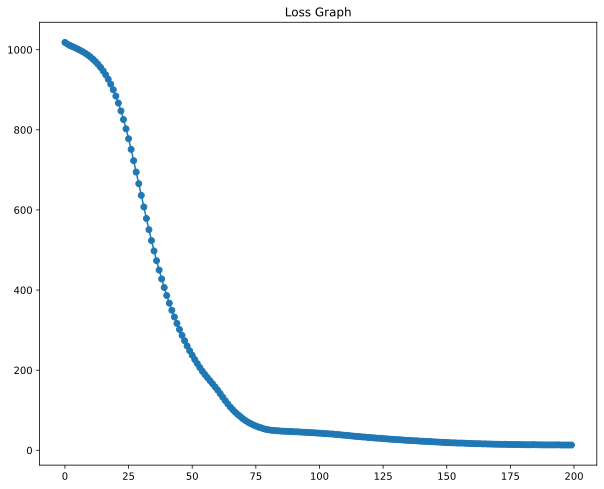

In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])
lstm.summary()
lstm.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='mse')
r = lstm.fit(X_train_reshaped,y_train,epochs=200,verbose=0)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
print('Training validation')
y_pred = lstm.predict(X_train_reshaped)
validation(y_train,y_pred)
print('Testing validation')
y_pred = lstm.predict(X_test_reshaped)
validation(y_test,y_pred)

In [ ]:

def experiment_with_lr(mod,lrs):
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
  ])
  for lr in lrs:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss='mse')
    r = model.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,y_test),epochs=100,verbose=0)
    y_pred = model.predict(X_train_reshaped)
    print(f'Training validation with lr {lr}')
    validation(y_train,y_pred)
    name = f'{mod} optimize train with lr {lr}.png'
    plot(model,X_train_reshaped,y_train,name,xlim_train)

    y_pred = model.predict(X_test_reshaped)
    print(f'Testing validation with lr {lr}')
    validation(y_test,y_pred)
    name = f'{mod} optimize test with lr {lr}.png'
    plot(model,X_test_reshaped,y_test,name,xlim_test)
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')




4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.1
R2 score:0.9670572203542891 MAE:1.552592029073964 RMSE:2.0707694652413022 ActualStd 11.409106438124159 PredStd 11.634231567382812
4/4 [==============================] - 0s 4ms/step
R2 score:0.9670572203542891 MAE:1.552592029073964 RMSE:2.0707694652413022 ActualStd 11.409106438124159 PredStd 11.634231567382812


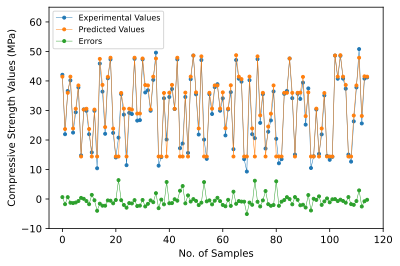

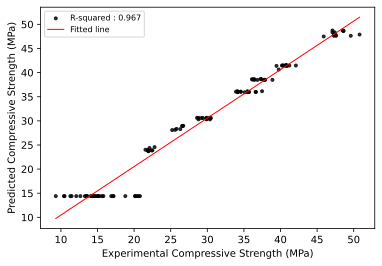

2/2 [==============================] - 0s 9ms/step
Testing validation with lr 0.1
R2 score:0.9526406208616099 MAE:1.8355188674926763 RMSE:2.250401663518722 ActualStd 10.340869085333203 PredStd 10.977768898010254
2/2 [==============================] - 0s 11ms/step
R2 score:0.9526406208616099 MAE:1.8355188674926763 RMSE:2.250401663518722 ActualStd 10.340869085333203 PredStd 10.977768898010254


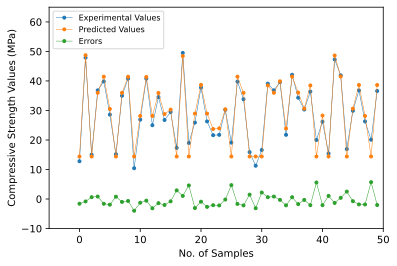

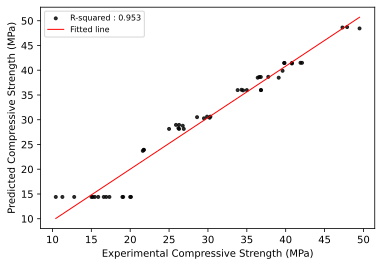

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 5ms/step
Training validation with lr 0.01
R2 score:0.9761929488398681 MAE:1.10964169145667 RMSE:1.7603719279222334 ActualStd 11.409106438124159 PredStd 11.231171607971191
4/4 [==============================] - 0s 4ms/step
R2 score:0.9761929488398681 MAE:1.10964169145667 RMSE:1.7603719279222334 ActualStd 11.409106438124159 PredStd 11.231171607971191


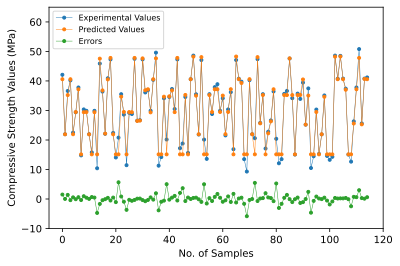

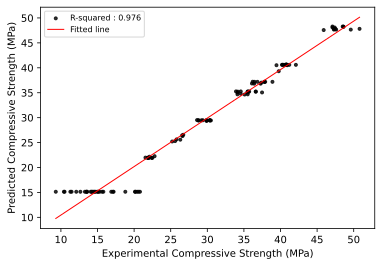

2/2 [==============================] - 0s 7ms/step
Testing validation with lr 0.01
R2 score:0.9694430779740428 MAE:1.2653019256591798 RMSE:1.8076395839776924 ActualStd 10.340869085333203 PredStd 10.442787170410156
2/2 [==============================] - 0s 13ms/step
R2 score:0.9694430779740428 MAE:1.2653019256591798 RMSE:1.8076395839776924 ActualStd 10.340869085333203 PredStd 10.442787170410156


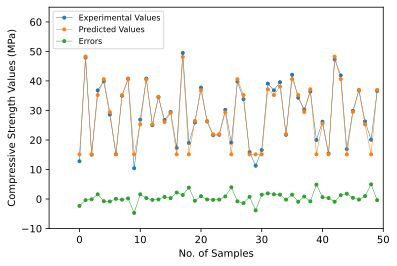

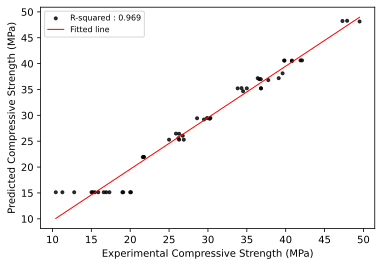

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.001
R2 score:0.9763839319712817 MAE:1.0804890292623768 RMSE:1.753296748358943 ActualStd 11.409106438124159 PredStd 11.280590057373047
4/4 [==============================] - 0s 4ms/step
R2 score:0.9763839319712817 MAE:1.0804890292623768 RMSE:1.753296748358943 ActualStd 11.409106438124159 PredStd 11.280590057373047


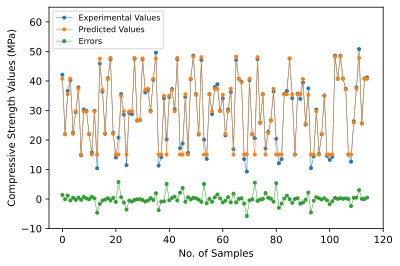

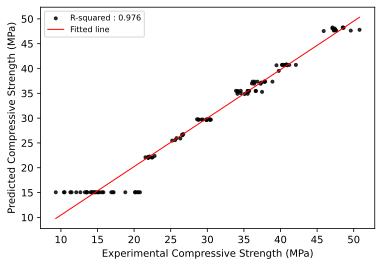

2/2 [==============================] - 0s 6ms/step
Testing validation with lr 0.001
R2 score:0.9695226499576058 MAE:1.2628137321472168 RMSE:1.805284450997942 ActualStd 10.340869085333203 PredStd 10.507401466369629
2/2 [==============================] - 0s 6ms/step
R2 score:0.9695226499576058 MAE:1.2628137321472168 RMSE:1.805284450997942 ActualStd 10.340869085333203 PredStd 10.507401466369629


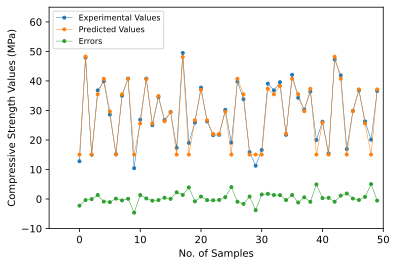

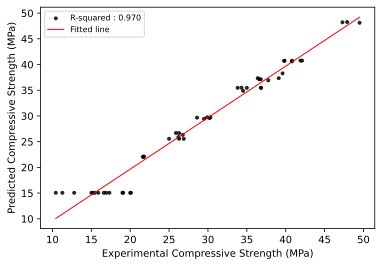

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Training validation with lr 0.0001
R2 score:0.9763856672714284 MAE:1.0799772793313729 RMSE:1.7532323313697702 ActualStd 11.409106438124159 PredStd 11.279934883117676
4/4 [==============================] - 0s 3ms/step
R2 score:0.9763856672714284 MAE:1.0799772793313729 RMSE:1.7532323313697702 ActualStd 11.409106438124159 PredStd 11.279934883117676


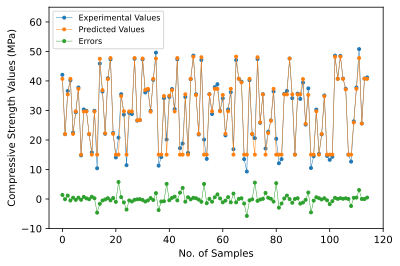

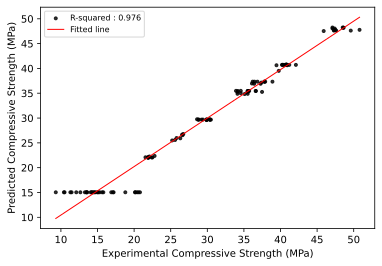

2/2 [==============================] - 0s 6ms/step
Testing validation with lr 0.0001
R2 score:0.969423261632164 MAE:1.2636209030151369 RMSE:1.8082256213793302 ActualStd 10.340869085333203 PredStd 10.506720542907715
2/2 [==============================] - 0s 14ms/step
R2 score:0.969423261632164 MAE:1.2636209030151369 RMSE:1.8082256213793302 ActualStd 10.340869085333203 PredStd 10.506720542907715


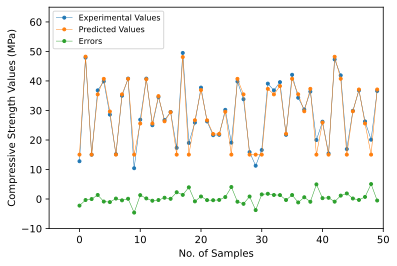

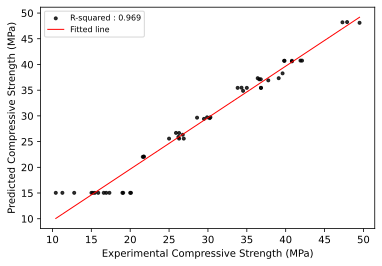

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------


In [ ]:
experiment_with_lr('lstm',[0.1,0.01,0.001,0.0001])